In [1]:
from import_sql.read_json import load_json_data
from utils import train_path

train_info = load_json_data(train_path)

数据读取完成


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.281 seconds.
Prefix dict has been built successfully.


词频统计已保存至 e:\database_project\project\utils\../data/word_count.xlsx


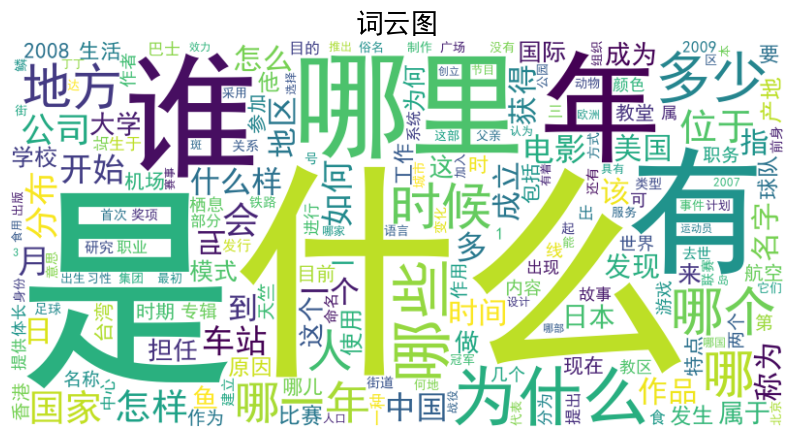

In [ ]:
import pandas as pd
import os
from openpyxl import Workbook
import jieba.posseg as pseg
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from utils import count_path

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体

# 获取文本数据
questions = train_info["Question"].tolist()

# 分词并获取词性
text = " ".join(questions)
words_with_pos = pseg.cut(text)  # 使用 pseg 进行分词并标注词性

# 过滤词性（只统计名词、动词等指定词性）
# allowed_pos = {'n', 'v', 'vn', 'nr', 'ns', 'nt', 'nz', 'ng', 'a', 'an'}  # 名词、动词、形容词等
allowed_pos = {"n", "r", "t", "m", "v", "vn"}
filtered_words = [word for word, flag in words_with_pos if flag in allowed_pos]

# 统计词频
word_counts = Counter(filtered_words)

# 对词频进行排序（从高到低）
sorted_word_counts = word_counts.most_common()

# 将词频统计结果保存到 DataFrame
word_counts_df = pd.DataFrame(sorted_word_counts, columns=['Word', 'Count'])

# 判断文件是否存在
if os.path.exists(count_path):
    # 如果文件存在，清空内容（创建一个新空白文件覆盖）
    wb = Workbook()
    wb.save(count_path)

# 写入数据到 Excel 文件
word_counts_df.to_excel(count_path, index=False, engine='openpyxl')  # 使用 openpyxl 引擎
print(f"词频统计已保存至 {count_path}")

# 生成词云
wordcloud = WordCloud(
    font_path="simhei.ttf",  # 中文字体文件路径
    background_color="white",
    width=800,
    height=400
).generate_from_frequencies(word_counts)

# 绘制词云图
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # 不显示坐标轴
plt.title("词云图", fontsize=20)
plt.show()

In [1]:
import jieba.posseg as pseg

questions = [
    ["哪里", "地方", "地区", "哪儿", "何地", "哪些地方", "何处",  # 地点
    "时候", "哪一年", "时间", "时期", "哪年", "何年", "多长时间", "几年", "多少岁",  # 时间
    "谁", "名字",  # 人物
    "多少", "几个", "几条",  # 数量
    "怎样", "如何", "怎么",  # 方式
    "是否",  # 判断
    "哪个", "哪家", "哪国", "哪一", "哪部", "哪一部", "何种",  # 选择
    "为什么", "为何", "原因",  # 原因
    "什么样", "怎么样"]  # 评价

    # ["小王什么时候遇到他"],
    # ["这里有多少人？"],
    # ["这条河有多长？"],
    # ["他是否能完成这个任务？"],
    # ["如何提高工作效率？"],
    # ["这个发明是谁的贡献？"],
    # ["中秋节是哪天？"],
    # ["长城位于哪里？"]
]

for texts in questions:
    for text in texts:
        words = pseg.cut(text)
        for word, flag in words:
            print(f"{word} -> {flag}", end=" ")
    print()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.453 seconds.
Prefix dict has been built successfully.


哪里 -> r 地方 -> n 地区 -> n 哪儿 -> r 何地 -> r 哪些地方 -> vn 何处 -> r 时候 -> n 哪一年 -> r 时间 -> n 时期 -> n 哪年 -> r 何年 -> r 多长时间 -> n 几年 -> m 多少岁 -> m 谁 -> r 名字 -> n 多少 -> m 几个 -> m 几条 -> m 怎样 -> r 如何 -> r 怎么 -> r 是否 -> v 哪个 -> r 哪家 -> r 哪 -> r 国 -> n 哪 -> r 一 -> m 哪部 -> r 哪一部 -> r 何种 -> r 为什么 -> r 为何 -> r 原因 -> n 什么样 -> r 怎么样 -> r 
